In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as col
import sys
sys.path.append('/pool/firebolt1/p484/projects/huang/rings')
from continuumanalysis3 import Continuum
from analyzeradprofile import *
from fitellipse import *

In [2]:
disk = {'filename': '/data/sandrews/jhfiles/LPfiles/taperedimages/GWLup_tapered.image.fits',
                          'distance':155,
                          'incl' : 39.9,
                          'PA' : 36.9,
                          'offsetx' : 1.09*.003,
                          'offsety' : -0.55*.003,
                          'size': 1.5,
                          'gamma': 0.6
                         }
maxrad = 125
radialbins = 0.5+1*np.arange(maxrad)

/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:1257: UserWarning: Power-law scaling on negative values is ill-defined, clamping to 0.
  warnings.warn("Power-law scaling on negative values is "
/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:1218: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)


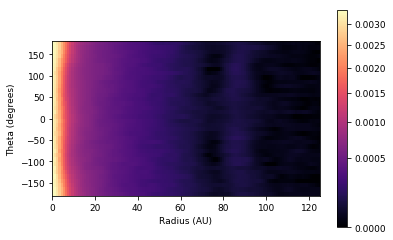

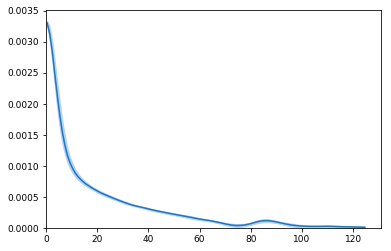

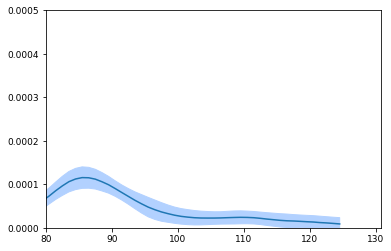

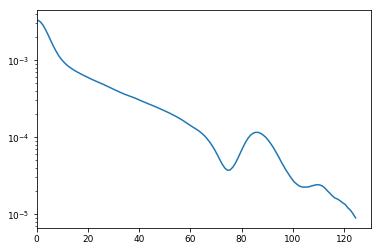

In [3]:

cont = Continuum(disk['filename'], disk['offsetx'],disk['offsety'], disk['PA'], disk['incl'], disk['distance'])

surfbrightness, SB_scatter, rtmap = cont.azunwrap(radialbins, tbins = -175 + 10.*np.arange(36))

plt.imshow(rtmap,extent =[0, np.max(radialbins)+1, -180,180], 
           aspect = 0.2, origin = 'lower', cmap = 'magma', norm = col.PowerNorm(gamma = disk['gamma']))
plt.ylim(ymin = -180, ymax = 180)
plt.xlim(xmin=0, xmax=maxrad)
plt.xlim(xmin=0, xmax=maxrad)
plt.colorbar()
plt.xlabel('Radius (AU)')
plt.ylabel('Theta (degrees)')
plt.show()

plt.plot(radialbins, surfbrightness)
plt.fill_between(radialbins,(surfbrightness - SB_scatter),(surfbrightness + SB_scatter),facecolor = '#B2D1FF',edgecolor = '#B2D1FF')
plt.xlim(xmin = 0)
plt.ylim(ymin =0)

plt.show()


plt.plot(radialbins, surfbrightness)
plt.fill_between(radialbins,(surfbrightness - SB_scatter),(surfbrightness + SB_scatter),facecolor = '#B2D1FF',edgecolor = '#B2D1FF')
plt.xlim(xmin = 80)
plt.ylim(ymin =0, ymax = 5.e-4)

plt.show()

plt.semilogy(radialbins, surfbrightness)
plt.xlim(xmin = 0)
plt.show()

/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:1257: UserWarning: Power-law scaling on negative values is ill-defined, clamping to 0.
  warnings.warn("Power-law scaling on negative values is "
/pool/firebolt1/p484/projects/huang/rings/fitellipse.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  for dx in roots[np.where(np.isreal(roots))].astype(np.float64):


The MLE offsets are delta_x = -2.265e-03 arcsec, delta_y = 1.158e-03 arcsec
The MLE semi-major axis is r = 0.552 arcsec
The MLE inclination is i = 38.966 degrees
The MLE position angle is PA = 37.305 degrees
The MLE log-variance in the pixel offsets from the true ellipse is -9.241e+00


/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:1218: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)


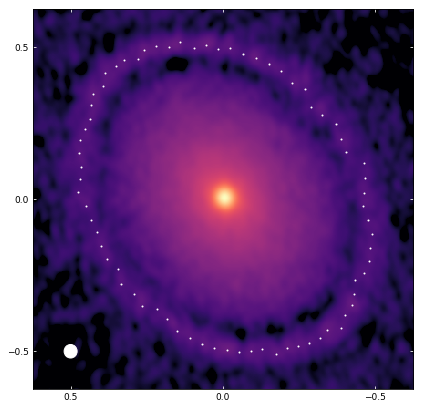

In [3]:
# Extract the ring that's at ~85 AU
xcoords1, ycoords1 = cont.extract_ring(80,100,tbins = -177.5+5*np.arange(72), extract_type = 'max')

cont.plot_extracted_ring(cont,xcoords1, ycoords1, 0.4, 1.25)

#get maximum likelihood estimates and check that ellipse parameters seem reasonable
mle_1 = ellipse_mle([disk["offsetx"],
                     disk["offsety"],
                     0.7,
                     np.cos(disk["incl"]*np.pi/180.),
                     disk["PA"]*np.pi/180., 
                     np.log(.01**2)], 
                    xcoords1, ycoords1)

In [4]:
#do mcmc fit
def lnprior(ellipse_params):
    x0, y0, r0, cosi, par, logvar = ellipse_params
    #flat priors on x0, y0, r0, logvar
    if not (-4.5 < x0 < 4.5 and -4.5 < y0 < 4.5 and 0 < r0 < 4.5 and -15<logvar<-5):
        return -np.inf
    #gaussian prior on PA and cosi based on Andrews+ 2018
    sig_par = .035
    sig_cosi = .01
    return -0.5*((par-0.681)/sig_par)**2-0.5*((cosi-0.788)/sig_cosi)**2

def lnprob(ellipse_params, xcoord, ycoord):
    lp = lnprior(ellipse_params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(ellipse_params, xcoord, ycoord)

nwalkers = 30
nthreads = 8
nsteps = 20000
sampler1 = run_mcmc(nwalkers, nthreads, nsteps, mle_1, lnprob, xcoords1, ycoords1)

/pool/firebolt1/p484/projects/huang/rings/fitellipse.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  for dx in roots[np.where(np.isreal(roots))].astype(np.float64):
/pool/firebolt1/p484/projects/huang/rings/fitellipse.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  for dx in roots[np.where(np.isreal(roots))].astype(np.float64):
/pool/firebolt1/p484/projects/huang/rings/fitellipse.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  for dx in roots[np.where(np.isreal(roots))].astype(np.float64):
/pool/firebolt1/p484/projects/huang/rings/fitellipse.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  for dx in roots[np.where(np.isreal(roots))].astype(np.float64):
/pool/firebolt1/p484/projects/huang/rings/fitellipse.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  for dx in roots[np.where(np.isreal(roots))].astype(np.float

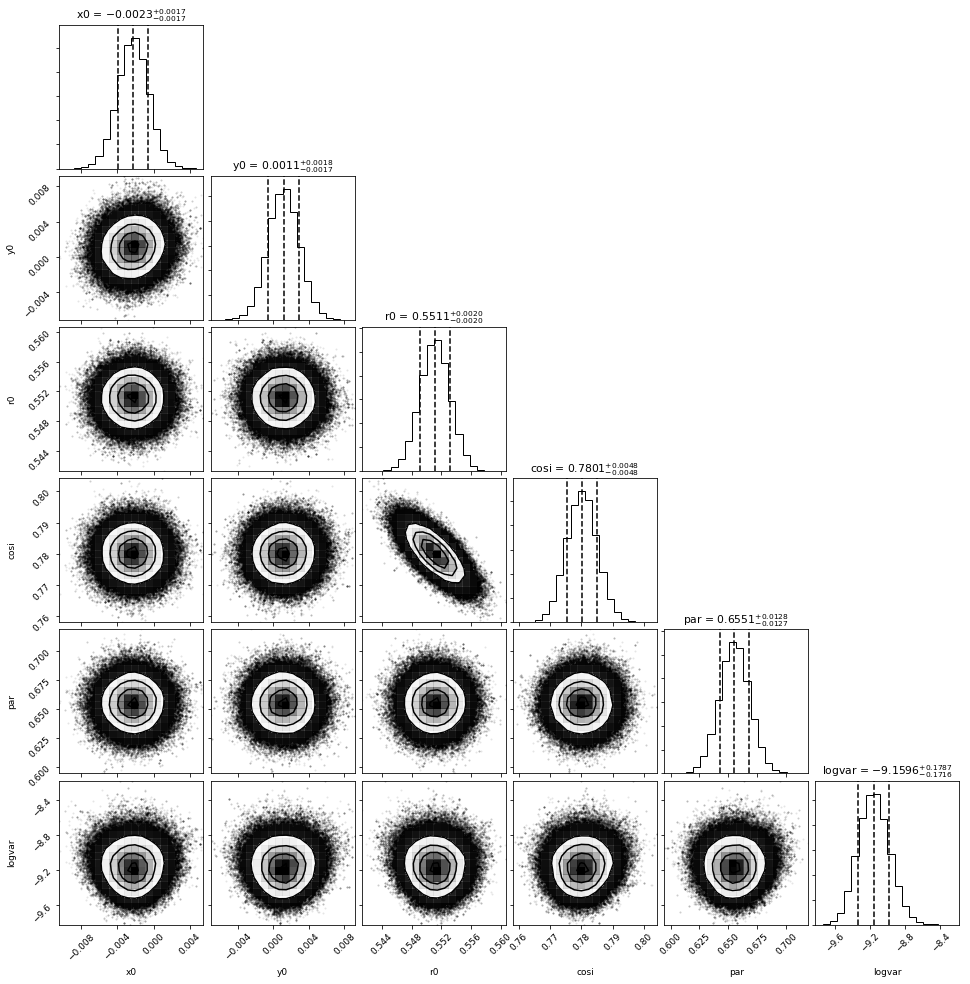

The x offset is delta_x = -2.26e-03 arcsec (+1.7e-03, -1.7e-03)
The y offset is delta_y = 1.14e-03 arcsec (+1.8e-03, -1.7e-03)
The median semi-major axis is r = 0.5511 arcsec (+0.0020, -0.0020) 
or 85.42 AU (+0.27, -0.27)
The incl is i = 38.73 deg (+0.44, -0.44)
The median position angle is PA = 37.53 deg (+0.73, -0.73)
The median log-variance in the pixel offsets from the true ellipse is -9.160e+00


In [6]:

plot_corner(sampler1, 500, 1)
sampler_results(sampler1, 500, cont.src_distance)

/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:1257: UserWarning: Power-law scaling on negative values is ill-defined, clamping to 0.
  warnings.warn("Power-law scaling on negative values is "
/pool/firebolt1/p484/projects/huang/rings/fitellipse.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  for dx in roots[np.where(np.isreal(roots))].astype(np.float64):


The MLE offsets are delta_x = -2.556e-03 arcsec, delta_y = 7.800e-04 arcsec
The MLE semi-major axis is r = 0.480 arcsec
The MLE inclination is i = 38.963 degrees
The MLE position angle is PA = 37.522 degrees
The MLE log-variance in the pixel offsets from the true ellipse is -9.490e+00


/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:1218: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)


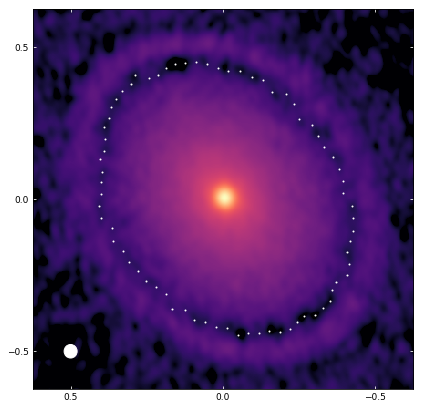

In [7]:
# Extract the gap that's at ~75 AU
xcoords2, ycoords2 = cont.extract_ring(70,80,tbins = -177.5+5*np.arange(72), extract_type = 'min')

cont.plot_extracted_ring(cont,xcoords2, ycoords2, 0.4, 1.25)

#get maximum likelihood estimates and check that ellipse parameters seem reasonable
mle_2 = ellipse_mle([disk["offsetx"],
                     disk["offsety"],
                     0.7,
                     np.cos(disk["incl"]*np.pi/180.),
                     disk["PA"]*np.pi/180., 
                     np.log(.01**2)], 
                    xcoords2, ycoords2)

In [8]:
sampler2 = run_mcmc(nwalkers, nthreads, nsteps, mle_2, lnprob, xcoords2, ycoords2)

/pool/firebolt1/p484/projects/huang/rings/fitellipse.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  for dx in roots[np.where(np.isreal(roots))].astype(np.float64):
/pool/firebolt1/p484/projects/huang/rings/fitellipse.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  for dx in roots[np.where(np.isreal(roots))].astype(np.float64):
/pool/firebolt1/p484/projects/huang/rings/fitellipse.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  for dx in roots[np.where(np.isreal(roots))].astype(np.float64):
/pool/firebolt1/p484/projects/huang/rings/fitellipse.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  for dx in roots[np.where(np.isreal(roots))].astype(np.float64):
/pool/firebolt1/p484/projects/huang/rings/fitellipse.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  for dx in roots[np.where(np.isreal(roots))].astype(np.float

In [9]:
np.savez("GWLupellipsechains.npz", BR85 = sampler1.chain, DA74 = sampler2.chain)

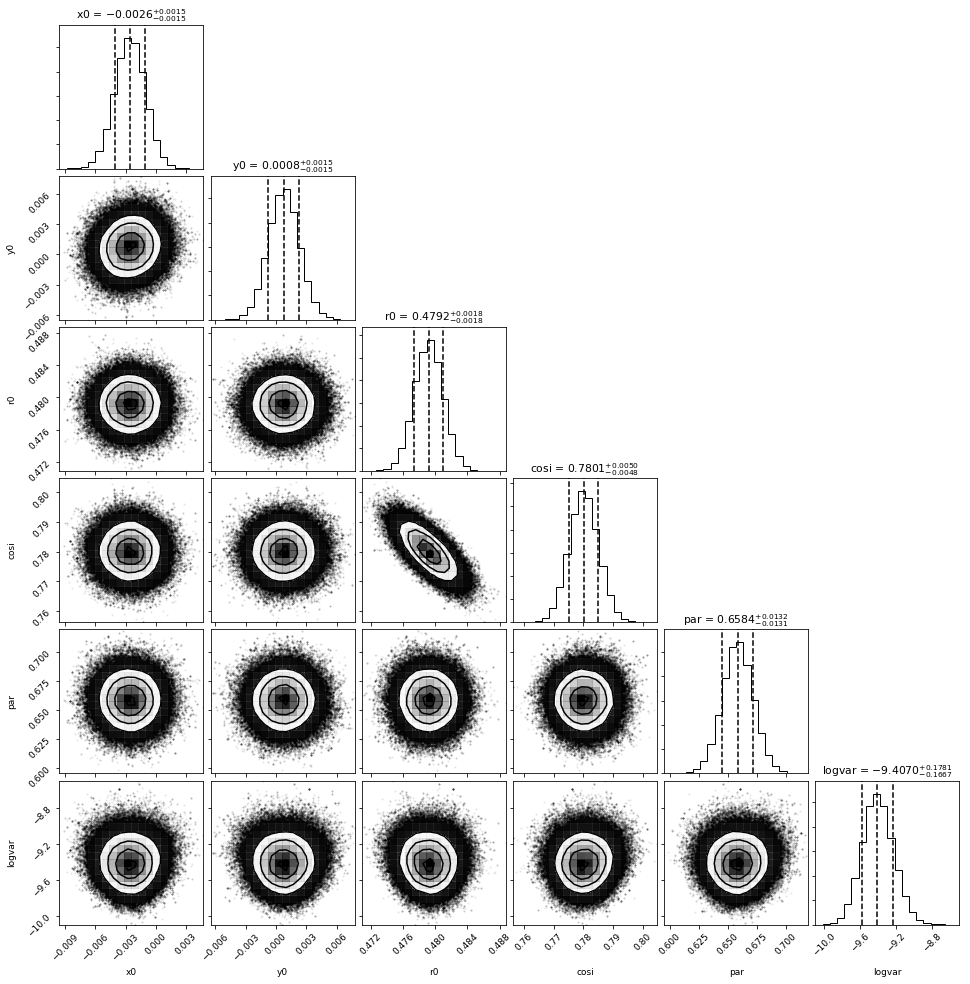

The x offset is delta_x = -2.56e-03 arcsec (+1.5e-03, -1.5e-03)
The y offset is delta_y = 7.75e-04 arcsec (+1.5e-03, -1.5e-03)
The median semi-major axis is r = 0.4792 arcsec (+0.0018, -0.0018) 
or 74.27 AU (+0.24, -0.24)
The incl is i = 38.73 deg (+0.44, -0.46)
The median position angle is PA = 37.72 deg (+0.76, -0.75)
The median log-variance in the pixel offsets from the true ellipse is -9.407e+00


In [10]:

plot_corner(sampler2, 500, 1)
sampler_results(sampler2, 500, cont.src_distance)

In [3]:
newcont = Continuum(disk['filename'], -0.0024,0.0009, 37.6, 38.73,disk['distance'])

In [4]:
radialbins = 0.5+np.arange(0, maxrad)
#make some preliminary plots

    
newsurfbrightness, newSB_scatter, newrtmap = newcont.azunwrap(radialbins, tbins = -175 + 10.*np.arange(36))


print("max",find_profile_extrema(radialbins, newsurfbrightness, extrema = 'max'))
print("min",find_profile_extrema(radialbins, newsurfbrightness, extrema = 'min'))

max [85, 108]
min [74, 103]


/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:1218: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)


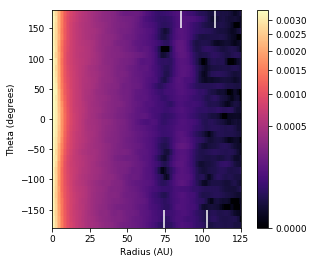

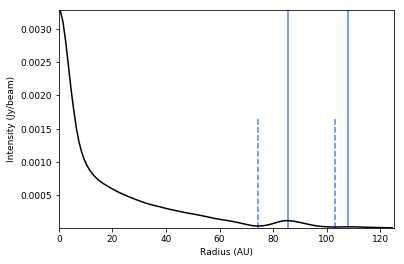

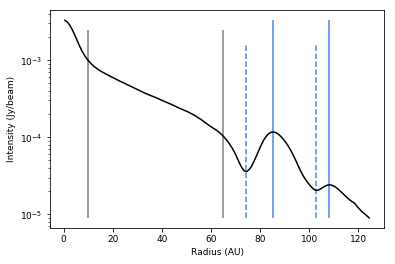

(0, 125)

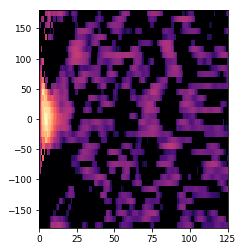

In [4]:
plt.imshow(newrtmap,extent =[0, np.max(radialbins)+1, -180,180], 
           aspect = 0.4, origin = 'lower', cmap = 'magma', vmin = 0, norm = col.PowerNorm(gamma = 0.4))
plt.ylim(ymin = -180, ymax = 180)
plt.xlim(xmin=0, xmax=maxrad)
plt.xlim(xmin=0, xmax=maxrad)
features = np.array([10,65])
gaps = np.array([74.3,103])
rings = np.array([85.4,108])
for gap in gaps:
    plt.vlines(gap,-180,-150, color ='white')
for ring in rings:
    plt.vlines(ring,150,180, color ='white')
for f in features:
    plt.vlines(f,np.min(newsurfbrightness),0.75*np.max(newsurfbrightness), color ='gray')

plt.colorbar()
plt.xlabel('Radius (AU)')
plt.ylabel('Theta (degrees)')
plt.show()


plt.plot(radialbins, newsurfbrightness, color = 'black')
for gap in gaps:
    plt.vlines(gap,np.min(newsurfbrightness),0.5*np.max(newsurfbrightness), color ='#4286f4', linestyles= 'dashed')
for ring in rings:
    plt.vlines(ring,np.min(newsurfbrightness),np.max(newsurfbrightness), color ='#4286f4')
plt.xlabel("Radius (AU)")
plt.ylabel("Intensity (Jy/beam)")
plt.xlim(xmin = 0, xmax = maxrad)
plt.ylim(ymin = np.min(newsurfbrightness), ymax = np.max(newsurfbrightness))
plt.show()

plt.semilogy(radialbins, newsurfbrightness, color = 'black')
for gap in gaps:
    plt.vlines(gap,np.min(newsurfbrightness),0.5*np.max(newsurfbrightness), color ='#4286f4', linestyles= 'dashed')
for ring in rings:
    plt.vlines(ring,np.min(newsurfbrightness),np.max(newsurfbrightness), color ='#4286f4')
for f in features:
    plt.vlines(f,np.min(newsurfbrightness),0.75*np.max(newsurfbrightness), color ='gray')

plt.xlabel("Radius (AU)")
plt.ylabel("Intensity (Jy/beam)")
plt.show()

plt.imshow(newrtmap-np.mean(newrtmap, axis =0),extent =[0, np.max(radialbins)+1, -180,180], 
           aspect = 0.4, origin = 'lower', cmap = 'magma', vmin = 0, norm = col.PowerNorm(gamma = 0.3))
plt.ylim(ymin = -180, ymax = 180)
plt.xlim(xmin=0, xmax=maxrad)
plt.xlim(xmin=0, xmax=maxrad)


In [8]:
calc_contrast(74.3, 85.4, radialbins, newsurfbrightness, newSB_scatter,newcont)

(0.30617746135296209, 0.026833223797914408)

In [10]:
measure_widths(74.3,85.4, radialbins, newsurfbrightness, 0, 150)

7.63769154024e-05 80.3


(12.099999999999994, 11.299999999999997)

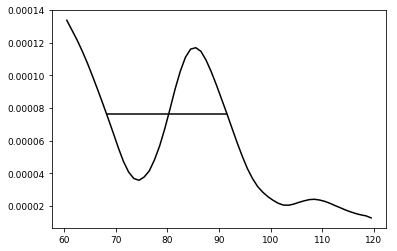

In [12]:
plt.plot(radialbins[60:120], newsurfbrightness[60:120], color = 'black')
plt.hlines(7.63769154024e-05, 80.3-12.1,80.3)
plt.hlines(7.63769154024e-05, 80.3,80.3+11.3)

In [9]:
calc_contrast(103.001, 108.001, radialbins, newsurfbrightness, newSB_scatter,newcont)

(0.84981191975156356, 0.086833658109674763)

In [13]:
measure_widths(103.001, 108.001, radialbins, newsurfbrightness, 0, 150)

2.22922482265e-05 105.5


(4.2999999999999972, 5.5)

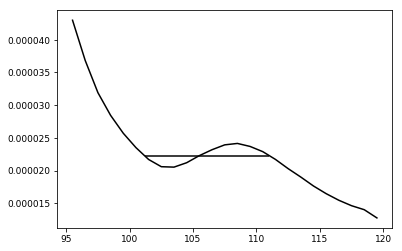

In [16]:
plt.plot(radialbins[95:120], newsurfbrightness[95:120], color = 'black')
plt.hlines(2.22922482265e-05, 105.5-4.3,105.5)
plt.hlines(2.22922482265e-05, 105.5,105.5+5.5)

In [6]:
bins = 0.5+1*np.arange(0, 175)

cumeflux = newcont.cumefluxprofile(bins)

104.5


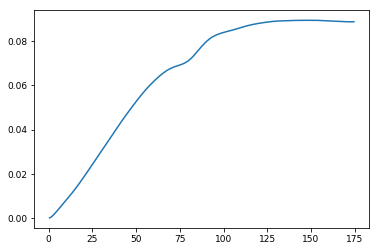

In [7]:
plt.plot(bins, cumeflux)
print(bins[np.argmin(np.abs(cumeflux-0.95*np.max(cumeflux)))])


In [28]:
np.pi*104.5*104.5*np.cos(newcont.incl*np.pi/180.)/newcont.src_distance**2

1.1139635051402146

In [32]:
beamsize = np.pi*newcont.bmin*newcont.bmaj/(4*np.log(2))

In [33]:
1.11/beamsize

515.0238089182651

In [34]:
np.sqrt(515)

22.693611435820433